In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.cluster import hierarchy

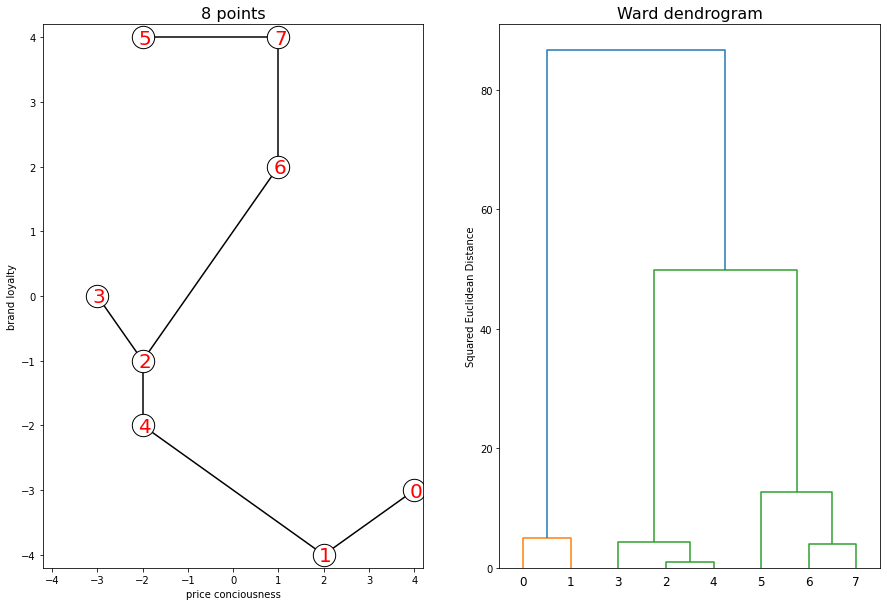

In [2]:
eight = np.array(([-3, -2, -2, -2, 1, 1, 2, 4], [0, 4, -1, -2, 4, 2, -4, -3])).T
eight = eight[[7,6,2,0,3,1,5,4], :]


d = np.zeros([8,8])

for i in range(0, 8):
    for j in range(0, 8):
        d[i, j] = np.linalg.norm(eight[i, :] - eight[j, :])

dd = (d**2)

ddd  = dd[1:, :-1][:, 0]
for i in range(1, 7):
    ddd = np.concatenate((ddd, dd[1:, :-1][i:, i]))

Z = hierarchy.linkage(ddd, 'ward')


fig = plt.figure(figsize = (15, 10))

fig.add_subplot(1, 2, 1)
plt.xlim(-4.2, 4.2)
plt.ylim(-4.2, 4.2)
plt.title("8 points", fontsize = 16)
plt.ylabel("brand loyalty")
plt.xlabel("price conciousness")

plt.plot([eight[0, 0], eight[1, 0]], [eight[0, 1], eight[1, 1]], c = "black", zorder = 0)
plt.plot([eight[1, 0], eight[4, 0]], [eight[1, 1], eight[4, 1]], c = "black", zorder = 0)
plt.plot([eight[4, 0], eight[2, 0]], [eight[4, 1], eight[2, 1]], c = "black", zorder = 0)
plt.plot([eight[2, 0], eight[3, 0]], [eight[2, 1], eight[3, 1]], c = "black", zorder = 0)
plt.plot([eight[2, 0], eight[6, 0]], [eight[2, 1], eight[6, 1]], c = "black", zorder = 0)
plt.plot([eight[6, 0], eight[7, 0]], [eight[6, 1], eight[7, 1]], c = "black", zorder = 0)
plt.plot([eight[7, 0], eight[5, 0]], [eight[7, 1], eight[5, 1]], c = "black", zorder = 0)

plt.scatter(eight[:, 0], eight[:, 1], c = "w", edgecolors = "black", s = 500)
for i in range(0, 8):
    plt.text(eight[i, 0]-0.1, eight[i, 1]-0.1, str(i), fontsize = 20, color = "r")
    
fig.add_subplot(1, 2, 2)

h = hierarchy.dendrogram(Z)
plt.title("Ward dendrogram", fontsize = 16)
plt.ylabel("Squared Euclidean Distance")

plt.show()

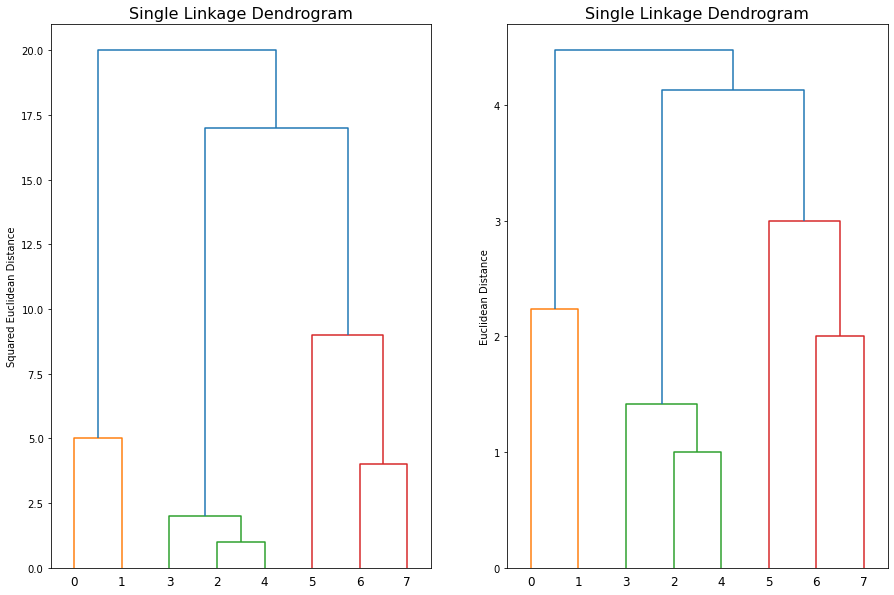

In [3]:
dddd  = d[1:, :-1][:, 0]
for i in range(1, 7):
    dddd = np.concatenate((dddd, d[1:, :-1][i:, i]))


Z1 = hierarchy.linkage(ddd, 'single')
Z2 = hierarchy.linkage(dddd, 'single')


fig = plt.figure(figsize = (15, 10))
fig.add_subplot(1, 2, 1)
h = hierarchy.dendrogram(Z1)
plt.title("Single Linkage Dendrogram", fontsize = 16)
plt.ylabel("Squared Euclidean Distance")

fig.add_subplot(1, 2, 2)
h = hierarchy.dendrogram(Z2)
plt.title("Single Linkage Dendrogram", fontsize = 16)
plt.ylabel("Euclidean Distance")

plt.show()